## Database Adult Income

In [1]:
!pip install keras-tuner
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.ensemble import VotingClassifier
from scikeras.wrappers import KerasClassifier

In [3]:
df_adultIncome = pd.read_csv('adult.csv')
df_adultIncome.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df_adultIncome.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
df_adultIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_adultIncome[df_adultIncome == '?'] = np.nan
df_adultIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df_adultIncome[col].fillna(df_adultIncome[col].mode()[0], inplace=True)

In [8]:
df_adultIncome.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
# Splitting data into features and classes
X_adultIncome = df_adultIncome.drop('income', axis=1)
y_adultIncome = df_adultIncome['income']


In [10]:
X_adultIncome.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [11]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_adultIncome, y_adultIncome, test_size=0.2, random_state=42)

In [12]:
from sklearn import preprocessing
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for i in categorical:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [13]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [14]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768,-1.258387,0.262402
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768,-0.447517,0.262402
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768,-0.042081,0.262402
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768,-1.663822,0.262402
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768,-0.042081,0.262402


In [15]:
y_train.head()

,income
5514,<=50K
19777,<=50K
10781,<=50K
32240,<=50K
9876,<=50K


In [16]:
y_train_numerical = y_train.astype('category').cat.codes
y_train_numerical

,0
5514,0
19777,0
10781,0
32240,0
9876,0
...,...
29802,0
5390,1
860,1
15795,1


In [17]:
model = Sequential([
    Flatten(input_shape=(14,)), # input layer
    Dense(128, activation='relu'), # hidden layer 1
    Dense(128, activation='relu'), # hidden layer 2
    Dense(2, activation='softmax') # output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    X_train,
    y_train_numerical,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8162 - loss: 0.3931 - val_accuracy: 0.8491 - val_loss: 0.3326
Epoch 2/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8479 - loss: 0.3244 - val_accuracy: 0.8509 - val_loss: 0.3261
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8512 - loss: 0.3159 - val_accuracy: 0.8541 - val_loss: 0.3271
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8508 - loss: 0.3129 - val_accuracy: 0.8484 - val_loss: 0.3289
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8544 - loss: 0.3121 - val_accuracy: 0.8516 - val_loss: 0.3311
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8514 - loss: 0.3128 - val_accuracy: 0.8532 - val_loss: 0.3316
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8565 - loss: 0.3028 - val_accuracy: 0.8560 - val_loss: 0.3309
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.3103 - val_accuracy: 0.

### Usando Emsemble Learning

#### AdaBoost


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

abc = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

model1 = abc.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy Score: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.8593582066635959


#### BagggingClassifier

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

bagging_classifier.fit(X_train, y_train)
y_pred2 = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8466144633809305


## Database Life Expectancy

In [22]:
!pip install keras-tuner

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set()
from sklearn.ensemble import IsolationForest # Outlier Detection
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback
from keras.optimizers import Adam # Optimizer
from keras_tuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore')

### Visualizacao e tratamento dos dados

In [24]:
df_life_expectancy = pd.read_csv('/content/Life Expectancy Data.csv')
df_life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
df_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [26]:
country_vs_life = df_life_expectancy.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by='Life expectancy ', ascending=False).head(25)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [27]:
country_vs_life.sort_values(by='Life expectancy ', ascending=True).head(25)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


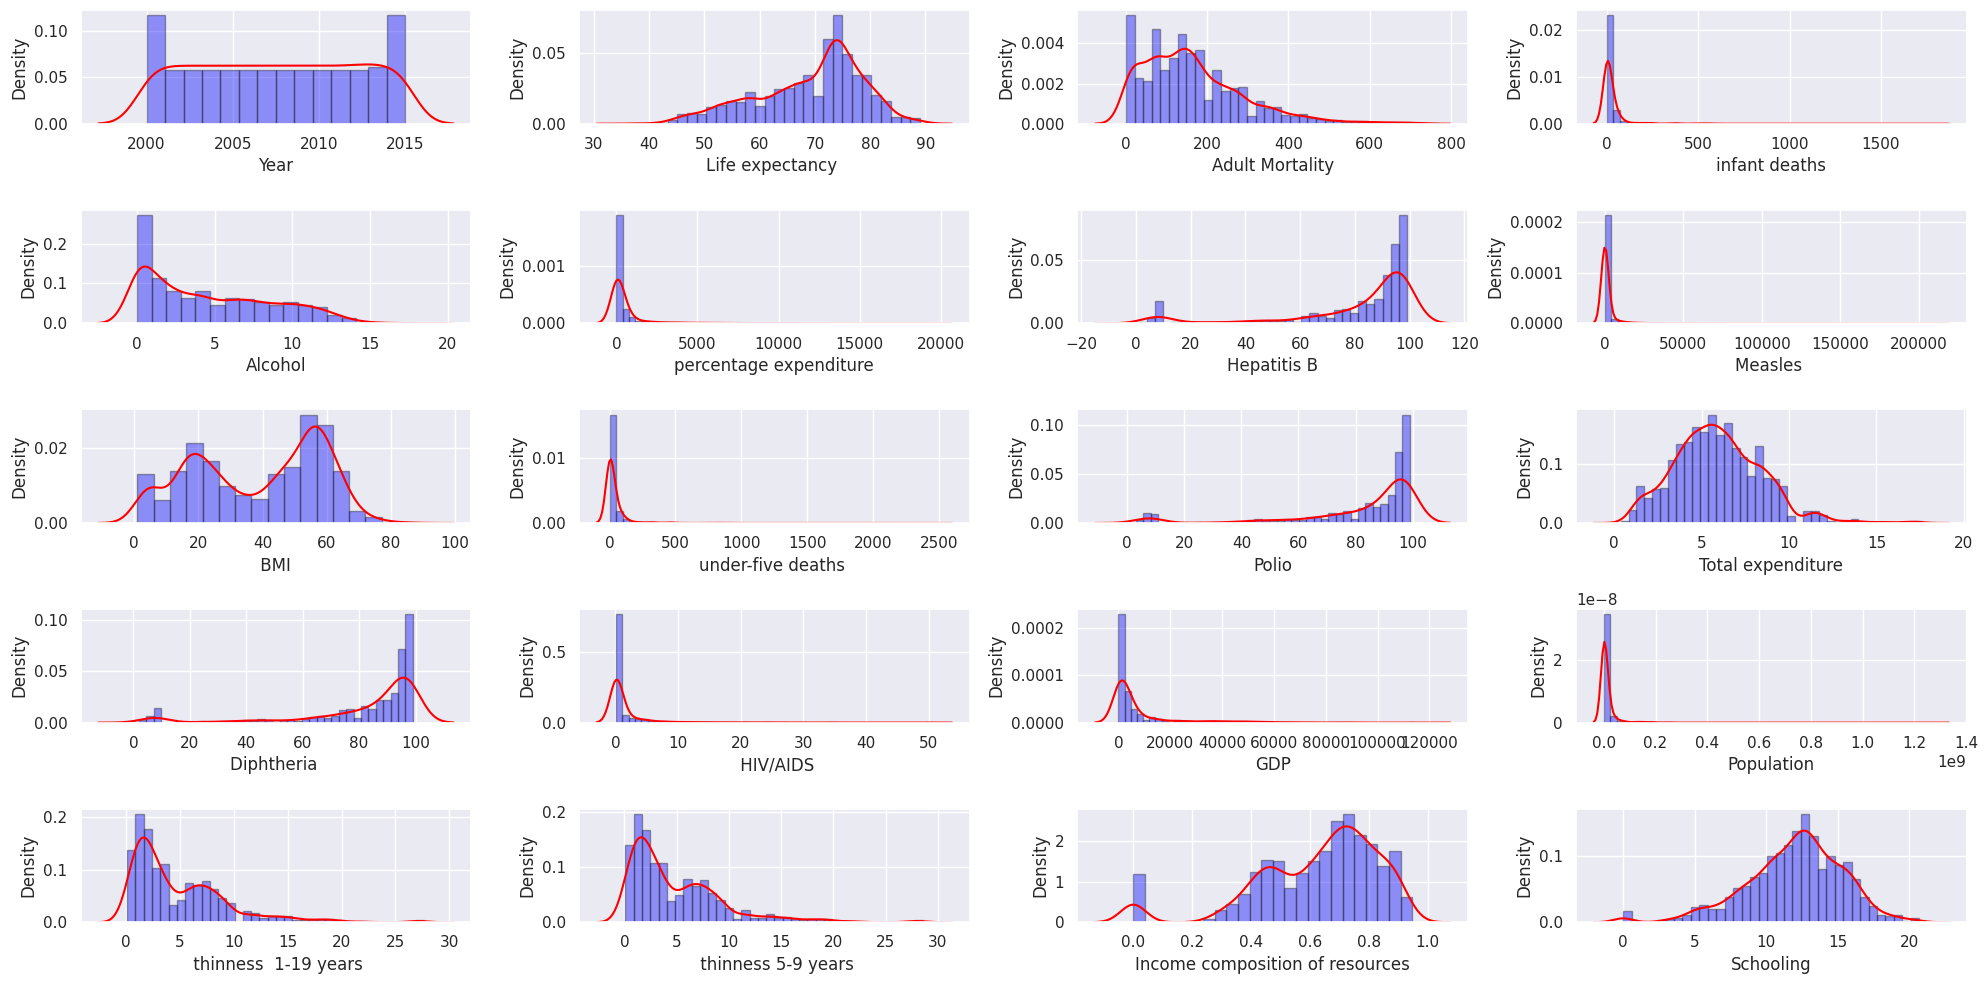

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = df_life_expectancy.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df_life_expectancy[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [30]:
df_life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
df_life_expectancy['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [32]:
df_life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [33]:
df_life_expectancy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [34]:
cols = df_life_expectancy.select_dtypes(include=['float64', 'int64'])
for i in cols:
  print(i, df_life_expectancy.value_counts())
  print('*******************************')

Year Country      Year  Status      Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  GDP          Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
Afghanistan  2000  Developing  54.8              321.0            88             0.01     10.424960               62.0         6532      12.2   122                 24.0   8.20               24.0         0.1        114.560000   293756.0    2.3                    2.5                  0.338                            5.5          1
Nicaragua    2005  Developing  71.2              194.0            3              3.70     218.571618              86.0         0         46.4   4                   87.0   6.11               86.0         0.3        1175.116225  5379328.0   2.0                    1.9                  0.592                            11.0         1
Niger  

In [35]:
df_life_expectancy['Country'].value_counts()

,count
Country,
Afghanistan,16
Peru,16
Nicaragua,16
Niger,16
Nigeria,16
...,...
Niue,1
San Marino,1
Nauru,1


In [36]:
df_life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [37]:
# Usando o SimpleImputer para preencher valores nulos com a media dos dados
from sklearn.impute import SimpleImputer # Import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

df_life_expectancy['Life expectancy ']=imputer.fit_transform(df_life_expectancy[['Life expectancy ']])
df_life_expectancy['Adult Mortality']=imputer.fit_transform(df_life_expectancy[['Adult Mortality']])
df_life_expectancy['Alcohol']=imputer.fit_transform(df_life_expectancy[['Alcohol']])
df_life_expectancy['Hepatitis B']=imputer.fit_transform(df_life_expectancy[['Hepatitis B']])
df_life_expectancy[' BMI ']=imputer.fit_transform(df_life_expectancy[[' BMI ']])
df_life_expectancy['Polio']=imputer.fit_transform(df_life_expectancy[['Polio']])
df_life_expectancy['Total expenditure']=imputer.fit_transform(df_life_expectancy[['Total expenditure']])
df_life_expectancy['Diphtheria ']=imputer.fit_transform(df_life_expectancy[['Diphtheria ']])
df_life_expectancy['GDP']=imputer.fit_transform(df_life_expectancy[['GDP']])
df_life_expectancy['Population']=imputer.fit_transform(df_life_expectancy[['Population']])
df_life_expectancy[' thinness  1-19 years']=imputer.fit_transform(df_life_expectancy[[' thinness  1-19 years']])
df_life_expectancy[' thinness 5-9 years']=imputer.fit_transform(df_life_expectancy[[' thinness 5-9 years']])
df_life_expectancy['Income composition of resources']=imputer.fit_transform(df_life_expectancy[['Income composition of resources']])
df_life_expectancy['Schooling']=imputer.fit_transform(df_life_expectancy[['Schooling']])

In [38]:
df_life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [39]:
import plotly.express as px

for column in df_life_expectancy.columns:
    fig = px.box(df_life_expectancy, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

In [40]:
X_life = df_life_expectancy.copy()
X_life.drop(['Life expectancy ', 'Country', 'Status'], axis=1, inplace=True)
X_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2938 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2938 non-null   float64
 10  Total expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12   HIV/AIDS           

### Tratando outliers

In [41]:
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = df_life_expectancy[col_name].quantile(0.25)
    q3 = df_life_expectancy[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df_life_expectancy[col_name] = np.where((df_life_expectancy[col_name] > upper_bound) | (df_life_expectancy[col_name] < lower_bound), np.mean(df_life_expectancy[col_name]), df_life_expectancy[col_name])

In [42]:
for column in df_life_expectancy.columns:
    fig = px.box(df_life_expectancy, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

In [43]:
# Agora, a fase de train e test e aplicacao do modelo ML
X_life_expectancy = df_life_expectancy.drop('Life expectancy ', axis=1)
y_life_expectancy = df_life_expectancy['Life expectancy ']

In [44]:
X_life_expectancy

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.000000,30.303948,0.01,71.279624,65.000000,2419.59224,19.1,...,82.550188,8.16,65.0,0.100000,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,Afghanistan,2014,Developing,271.000000,30.303948,0.01,73.523582,62.000000,492.00000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,Afghanistan,2013,Developing,268.000000,30.303948,0.01,73.219243,64.000000,430.00000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,Afghanistan,2012,Developing,272.000000,30.303948,0.01,78.184215,67.000000,2419.59224,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,Afghanistan,2011,Developing,275.000000,30.303948,0.01,7.097109,68.000000,2419.59224,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,164.796448,27.000000,4.36,0.000000,68.000000,31.00000,27.1,...,67.000000,7.13,65.0,1.742103,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,Zimbabwe,2003,Developing,164.796448,26.000000,4.06,0.000000,80.940461,2419.59224,26.7,...,82.550188,6.52,68.0,1.742103,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,Zimbabwe,2002,Developing,73.000000,25.000000,4.43,0.000000,73.000000,304.00000,26.3,...,73.000000,6.53,71.0,1.742103,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,Zimbabwe,2001,Developing,164.796448,25.000000,1.72,0.000000,76.000000,529.00000,25.9,...,76.000000,6.16,75.0,1.742103,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


In [45]:
y_life_expectancy

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


In [46]:
df_life_expectancy['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [47]:
scaling_cols = ['Country', 'Status']

label_encoder = LabelEncoder()
for col in scaling_cols:
    df_life_expectancy[col] = label_encoder.fit_transform(df_life_expectancy[col])

In [48]:
df_life_expectancy['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
df_life_expectancy['Status'].unique()

array([1, 0])

In [50]:
X_life_expectancy = df_life_expectancy.drop('Life expectancy ', axis=1)
y_life_expectancy = df_life_expectancy['Life expectancy ']

In [51]:
X_life_expectancy

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.000000,30.303948,0.01,71.279624,65.000000,2419.59224,19.1,...,82.550188,8.16,65.0,0.100000,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1,271.000000,30.303948,0.01,73.523582,62.000000,492.00000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1,268.000000,30.303948,0.01,73.219243,64.000000,430.00000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1,272.000000,30.303948,0.01,78.184215,67.000000,2419.59224,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1,275.000000,30.303948,0.01,7.097109,68.000000,2419.59224,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,164.796448,27.000000,4.36,0.000000,68.000000,31.00000,27.1,...,67.000000,7.13,65.0,1.742103,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,192,2003,1,164.796448,26.000000,4.06,0.000000,80.940461,2419.59224,26.7,...,82.550188,6.52,68.0,1.742103,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,192,2002,1,73.000000,25.000000,4.43,0.000000,73.000000,304.00000,26.3,...,73.000000,6.53,71.0,1.742103,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,192,2001,1,164.796448,25.000000,1.72,0.000000,76.000000,529.00000,25.9,...,76.000000,6.16,75.0,1.742103,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaling_cols = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

scaler = MinMaxScaler()
X_life_expectancy[scaling_cols] = scaler.fit_transform(X_life_expectancy[scaling_cols])

In [53]:
X_life_expectancy

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1,0.578366,0.550981,0.000000,0.065265,0.150000,1.000000,0.209733,...,0.657296,0.686949,0.291667,0.000000,0.032752,0.408423,0.311823,0.309761,0.325180,0.360000
1,0.0,0.933333,1,0.596026,0.550981,0.000000,0.067320,0.075000,0.203340,0.203940,...,0.145833,0.688713,0.229167,0.000000,0.034350,0.010490,0.311823,0.309761,0.320863,0.353333
2,0.0,0.866667,1,0.589404,0.550981,0.000000,0.067041,0.125000,0.177716,0.198146,...,0.229167,0.684303,0.270833,0.000000,0.035421,0.408423,0.311823,0.309761,0.312230,0.346667
3,0.0,0.800000,1,0.598234,0.550981,0.000000,0.071587,0.200000,1.000000,0.192352,...,0.333333,0.718695,0.333333,0.000000,0.037570,0.118393,0.311823,0.309761,0.302158,0.340000
4,0.0,0.733333,1,0.604857,0.550981,0.000000,0.006498,0.225000,1.000000,0.187717,...,0.354167,0.661376,0.354167,0.000000,0.003477,0.095388,0.311823,0.309761,0.289209,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,1,0.361582,0.490909,0.262523,0.000000,0.225000,0.012812,0.302433,...,0.333333,0.596120,0.291667,0.965943,0.025449,0.409196,0.611842,0.603896,0.221583,0.300000
2934,1.0,0.200000,1,0.361582,0.472727,0.244418,0.000000,0.548512,1.000000,0.297798,...,0.657296,0.542328,0.354167,0.965943,0.025392,0.404596,0.638158,0.636364,0.237410,0.320000
2935,1.0,0.133333,1,0.158940,0.454545,0.266747,0.000000,0.350000,0.125641,0.293163,...,0.458333,0.543210,0.416667,0.965943,0.003130,0.004019,0.072368,0.077922,0.250360,0.353333
2936,1.0,0.066667,1,0.361582,0.454545,0.103199,0.000000,0.425000,0.218632,0.288528,...,0.520833,0.510582,0.500000,0.965943,0.030746,0.396022,0.098684,0.103896,0.250360,0.340000


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_life_expectancy, y_life_expectancy, test_size=0.2, random_state=42)

In [55]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [56]:
model = Sequential([
        Dense(64, activation='relu', input_dim=21),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])

In [57]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error','mean_squared_error']
    )

In [58]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 4445.8013 - mean_absolute_error: 65.7033 - mean_squared_error: 4445.8013 - val_loss: 423.5818 - val_mean_absolute_error: 18.5525 - val_mean_squared_error: 423.5818
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 184.0488 - mean_absolute_error: 10.9337 - mean_squared_error: 184.0488 - val_loss: 89.1805 - val_mean_absolute_error: 7.5358 - val_mean_squared_error: 89.1805
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.3877 - mean_absolute_error: 7.3050 - mean_squared_error: 83.3877 - val_loss: 77.9083 - val_mean_absolute_error: 7.0817 - val_mean_squared_error: 77.9083
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.9483 - mean_absolute_error: 6.9365 - mean_squared_error: 72.9483 - val_loss: 67.4539 - val_mean_absolute_error: 6.5677 - val_mean_squared_error: 67.4539
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.8673 - mean_absolute_error: 6.3191 - mean_squared_error: 60.8673 -

In [59]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
print(f"R2 Score: {R2}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2 Score: 0.9146178537868487


### Usando Emsemble Learning para melhorar a performance do modelo

#### AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

model_1 = abc.fit(X_train, y_train)
y_pred3 = model_1.predict(X_test)
R2 = r2_score(y_test, y_pred3)
print(f"R2 Score: {R2}")

R2 Score: 0.8961199097074704


#### Utilizando o BaggingRegressor

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_regressor = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=10,
    random_state=42
)

bagging_regressor.fit(X_train, y_train)
y_pred4 = bagging_regressor.predict(X_test)
R2 = r2_score(y_test, y_pred4)
print(f"R2 Score: {R2}")

R2 Score: 0.9551813970611138
